# Imoprt library

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from imblearn.over_sampling import SMOTE
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
from sklearn.preprocessing import StandardScaler

# EDA

In [ ]:
df = pd.read_csv('/content/sample_data/telco-customer-churn.csv', delimiter = ',')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20468 entries, 0 to 20467
Data columns (total 29 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   age                                   20468 non-null  int64  
 1   annualincome                          20468 non-null  int64  
 2   calldroprate                          20468 non-null  float64
 3   callfailurerate                       20468 non-null  float64
 4   callingnum                            20468 non-null  int64  
 5   customerid                            20468 non-null  int64  
 6   customersuspended                     20468 non-null  object 
 7   education                             20468 non-null  object 
 8   gender                                20468 non-null  object 
 9   homeowner                             20468 non-null  object 
 10  maritalstatus                         20468 non-null  object 
 11  monthlybilledam

# Descritpion

• age: the age of the client

• annualincome: the annual income of the client

• gender: the gender of the client

• education: the level of education of the client

• maritalstatus: marital status of the client

• homeowner: is the client the owner of the home

• occupation: the client's profession


• state: the client's state of residence

Communication data:

• callingnum: the customer's phone number

• customerid: the unique identifier of the customer

• customersuspended: Has the customer been temporarily disconnected from the services

• noadditionallines: Does the customer have additional phone lines

• usesinternetservice: Does the client use Internet services

• usesvoiceservice: Does the client use voice services

• percentagecalloutsidenetwork: percentage of calls made outside the operator's network

• totalcallduration: total customer call time

• avgcallduration: the average duration of a customer's call

• calldroprate: percentage of dropped calls

• callfailurerate: percentage of unsuccessful calls

Financial data:

• monthlybilledamount: the amount of the monthly payment

• numberofmonthunpaid: the number of months overdue

• unpaid balance: the amount of debt

• penaltytoswitch: the amount of the penalty for switching to another operator

• numberofcomplaints: the number of complaints from the client

Contract details:

• numdayscontractequipmentplanexpiring: The number of days before the expiration of the equipment plan contract

Additional data:

• totalminsusedinlastmonth: The total number of minutes used in the last
month

• churn: has the customer been disconnected from the services (churn)

• year: year

• month: month

## Categorical feature encoding
* customersuspended -- ['Yes', 'No'], [1,0]
* education -- ['High School or below','Bachelor or equivalent','Master or equivalent', 'PhD or equivalent'], [0,1,2,3]
* gender -- ['Female', 'Male'], [0,1]
* occupation -- ['Others', 'Non-technology Related Job', 'Technology Related Job'], [0,1,2]
* state -- ['HI', 'MD', 'NY', 'AK', 'FL', 'NH', 'WY', 'MN', 'KY', 'AZ', 'CA', 'PA', 'WA', 'CO', 'MT', 'WI', 'TX', 'OH', 'ND', 'SD', 'UT', 'IN', 'DE', 'IA', 'ID', 'VA', 'SC', 'LA', 'MS', 'MA', 'NV', 'KS', 'OR', 'NM', 'MI', 'NJ', 'MO', 'IL', 'RI', 'VT', 'OK', 'NE', 'ME', 'NC', 'TN', 'WV', 'CT', 'GA', 'AR', 'AL'], [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]
* usesinternetservice -- ['No', 'Yes'], [0, 1]
* usesvoiceservice -- ['No', 'Yes'], [0, 1]



In [ ]:
df.customersuspended = df.customersuspended.replace(['Yes', 'No'], [1, 0])
df.education = df.education.replace(['High School or below','Bachelor or equivalent','Master or equivalent', 'PhD or equivalent'], [0,1,2,3])
df.gender = df.gender.replace(['Female', 'Male'], [0, 1])
df.homeowner = df.homeowner.replace(['Yes', 'No'], [1, 0])
df.maritalstatus = df.maritalstatus.replace(['Single', 'Married'], [1, 0])
del df['noadditionallines']
df.occupation = df.occupation.replace(['Others', 'Non-technology Related Job', 'Technology Related Job'], [0,1,2])
df.state = df.state.replace([item[0] for item in list(df.state.value_counts().items())], list(range(50)))
df.usesinternetservice = df.usesinternetservice.replace(['No', 'Yes'], [0, 1])
df.usesvoiceservice = df.usesvoiceservice.replace(['No', 'Yes'], [0, 1])
del df['year']
del df['month']
df.describe()

,age,annualincome,calldroprate,callfailurerate,callingnum,customerid,customersuspended,education,gender,homeowner,...,penaltytoswitch,state,totalminsusedinlastmonth,unpaidbalance,usesinternetservice,usesvoiceservice,percentagecalloutsidenetwork,totalcallduration,avgcallduration,churn
count,20468.000000,20468.000000,20468.000000,20468.000000,2.046800e+04,20468.000000,20468.000000,20468.000000,20468.000000,20468.000000,...,20468.000000,20468.000000,20468.000000,20468.000000,20468.000000,20468.000000,20468.000000,20468.000000,20468.000000,20468.000000
mean,45.334327,124446.818253,0.035021,0.015239,4.220203e+09,4757.953342,0.978405,0.751319,0.488274,0.800274,...,248.792603,23.127370,249.740522,126.656879,0.038743,0.091362,0.496528,3521.696306,721.521057,0.091020
std,19.624577,72129.392001,0.022996,0.011213,3.365196e+08,2751.070062,0.145360,0.887094,0.499875,0.399804,...,144.247247,14.323406,144.198066,70.367800,0.192987,0.288130,0.288220,1959.642260,225.677596,0.287645
min,12.000000,4.000000,0.000000,0.000000,1.022955e+08,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,28.000000,61898.000000,0.010000,0.010000,4.251031e+09,2372.750000,1.000000,0.000000,0.000000,1.000000,...,124.000000,11.000000,126.000000,66.000000,0.000000,0.000000,0.250000,2047.750000,582.000000,0.000000
50%,45.000000,123689.500000,0.040000,0.020000,4.251054e+09,4754.000000,1.000000,1.000000,0.000000,1.000000,...,249.000000,22.000000,249.000000,122.000000,0.000000,0.000000,0.500000,3365.000000,721.000000,0.000000
75%,62.000000,187065.250000,0.060000,0.030000,4.251077e+09,7141.250000,1.000000,1.000000,1.000000,1.000000,...,373.000000,35.000000,374.000000,191.000000,0.000000,0.000000,0.750000,4786.250000,862.000000,0.000000
max,79.000000,249987.000000,0.070000,0.030000,4.251100e+09,9525.000000,1.000000,3.000000,1.000000,1.000000,...,499.000000,49.000000,499.000000,249.000000,1.000000,1.000000,0.990000,16662.000000,1439.000000,1.000000


In [ ]:
df.columns

Index(['age', 'annualincome', 'calldroprate', 'callfailurerate', 'callingnum',
       'customerid', 'customersuspended', 'education', 'gender', 'homeowner',
       'maritalstatus', 'monthlybilledamount', 'numberofcomplaints',
       'numberofmonthunpaid', 'numdayscontractequipmentplanexpiring',
       'occupation', 'penaltytoswitch', 'state', 'totalminsusedinlastmonth',
       'unpaidbalance', 'usesinternetservice', 'usesvoiceservice',
       'percentagecalloutsidenetwork', 'totalcallduration', 'avgcallduration',
       'churn'],
      dtype='object')

In [ ]:
df.describe()

,age,annualincome,calldroprate,callfailurerate,callingnum,customerid,customersuspended,education,gender,homeowner,...,penaltytoswitch,state,totalminsusedinlastmonth,unpaidbalance,usesinternetservice,usesvoiceservice,percentagecalloutsidenetwork,totalcallduration,avgcallduration,churn
count,20468.000000,20468.000000,20468.000000,20468.000000,2.046800e+04,20468.000000,20468.000000,20468.000000,20468.000000,20468.000000,...,20468.000000,20468.000000,20468.000000,20468.000000,20468.000000,20468.000000,20468.000000,20468.000000,20468.000000,20468.000000
mean,45.334327,124446.818253,0.035021,0.015239,4.220203e+09,4757.953342,0.978405,0.751319,0.488274,0.800274,...,248.792603,23.127370,249.740522,126.656879,0.038743,0.091362,0.496528,3521.696306,721.521057,0.091020
std,19.624577,72129.392001,0.022996,0.011213,3.365196e+08,2751.070062,0.145360,0.887094,0.499875,0.399804,...,144.247247,14.323406,144.198066,70.367800,0.192987,0.288130,0.288220,1959.642260,225.677596,0.287645
min,12.000000,4.000000,0.000000,0.000000,1.022955e+08,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,28.000000,61898.000000,0.010000,0.010000,4.251031e+09,2372.750000,1.000000,0.000000,0.000000,1.000000,...,124.000000,11.000000,126.000000,66.000000,0.000000,0.000000,0.250000,2047.750000,582.000000,0.000000
50%,45.000000,123689.500000,0.040000,0.020000,4.251054e+09,4754.000000,1.000000,1.000000,0.000000,1.000000,...,249.000000,22.000000,249.000000,122.000000,0.000000,0.000000,0.500000,3365.000000,721.000000,0.000000
75%,62.000000,187065.250000,0.060000,0.030000,4.251077e+09,7141.250000,1.000000,1.000000,1.000000,1.000000,...,373.000000,35.000000,374.000000,191.000000,0.000000,0.000000,0.750000,4786.250000,862.000000,0.000000
max,79.000000,249987.000000,0.070000,0.030000,4.251100e+09,9525.000000,1.000000,3.000000,1.000000,1.000000,...,499.000000,49.000000,499.000000,249.000000,1.000000,1.000000,0.990000,16662.000000,1439.000000,1.000000


There are no outliers or gaps in the datа

Top 17 features sorted by corr value

In [42]:
corr_matrix = df.corr()
# Create a list with results
correlation_list = []
for i in range(len(corr_matrix.columns)):
    for j in range(i + 1, len(corr_matrix.columns)):
        column1 = corr_matrix.columns[i]
        column2 = corr_matrix.columns[j]
        correlation = corr_matrix.iloc[i, j]
        correlation_list.append([column1, column2, correlation])

# Sort the list by correlation value
correlation_list.sort(key=lambda x: x[2], reverse=True)

# Print the list
# print(correlation_list[:10])
corr_list = pd.DataFrame(correlation_list[2:20],
columns=['column_1','column_2', 'value'])  # Corrected column names
corr_list

,column_1,column_2,value
0,calldroprate,gender,0.088261
1,customerid,state,0.065964
2,numberofcomplaints,churn,0.054646
3,numberofcomplaints,totalminsusedinlastmonth,0.047927
4,unpaidbalance,churn,0.047482
5,callingnum,occupation,0.045614
6,age,gender,0.043036
7,calldroprate,numberofcomplaints,0.030443
8,calldroprate,totalminsusedinlastmonth,0.025049
9,monthlybilledamount,usesvoiceservice,0.020799


## Visualisation in graph

The corelation matrix

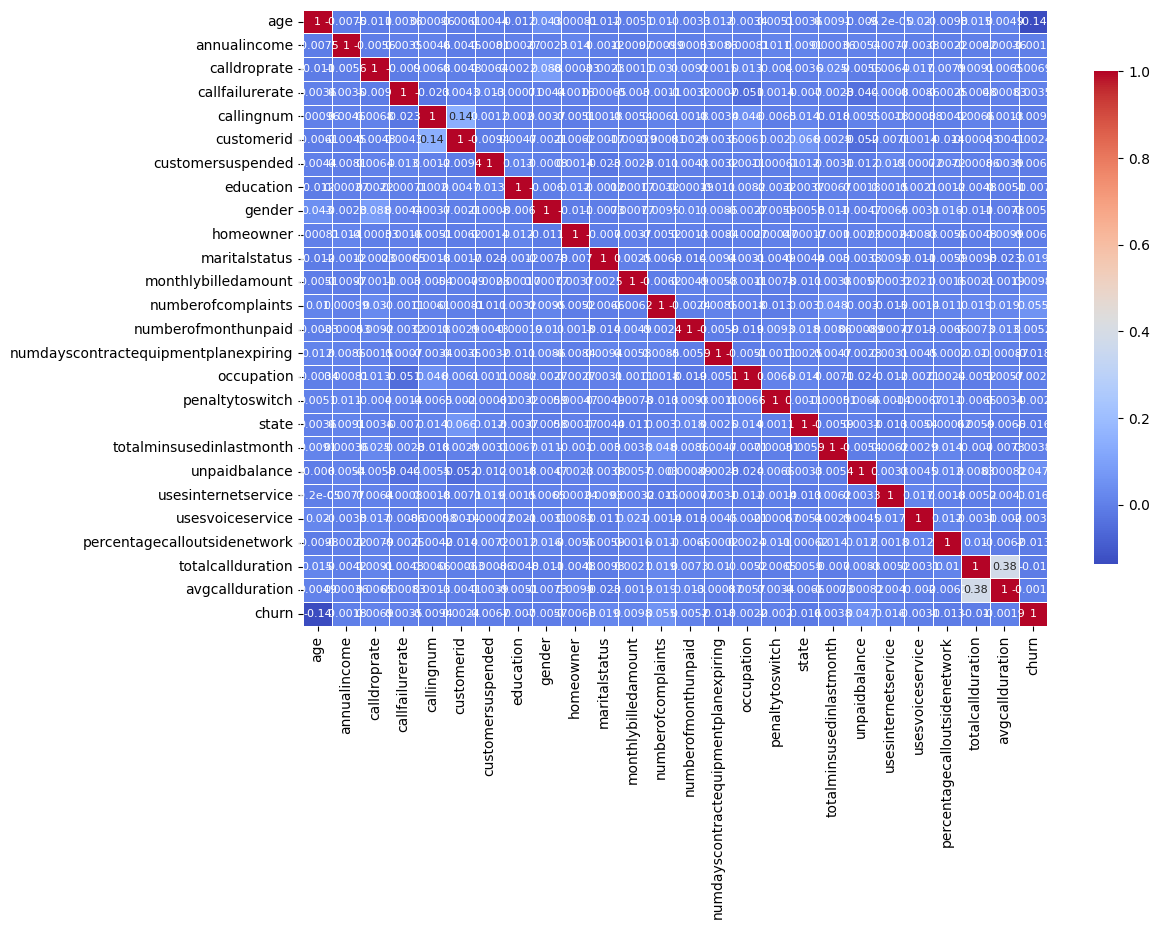

In [ ]:
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", annot_kws={"fontsize": 8},
            cbar_kws={"shrink": 0.8}, linewidths=0.5)
plt.savefig('heatmap.png', dpi=300)

<Axes: xlabel='numberofcomplaints', ylabel='Count'>

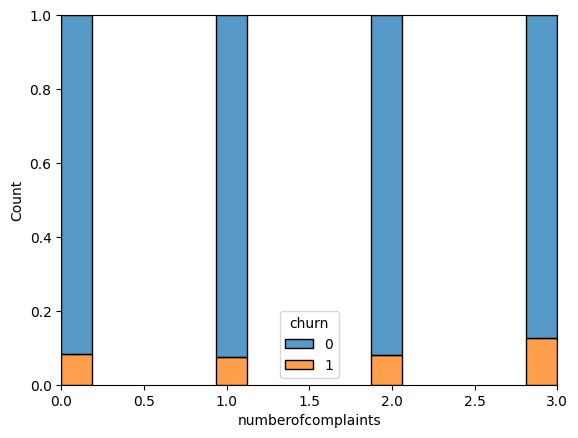

In [ ]:
sns.histplot(data=df,  x='numberofcomplaints', hue='churn', multiple="fill")

If the number of errors is 3, the probability of losing a subscriber increases by 50%.

<Axes: xlabel='age', ylabel='Count'>

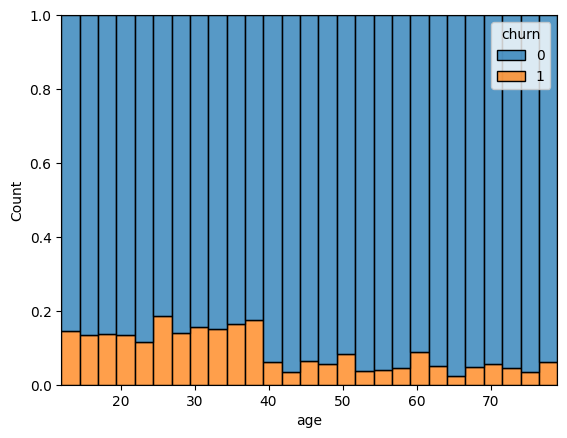

In [ ]:
sns.histplot(data=df,  x='age', hue='churn', multiple="fill")

The audience of users from 0 to 40 years old will decide to switch to another operator in 17-20% of cases.

<Axes: xlabel='unpaidbalance', ylabel='Count'>

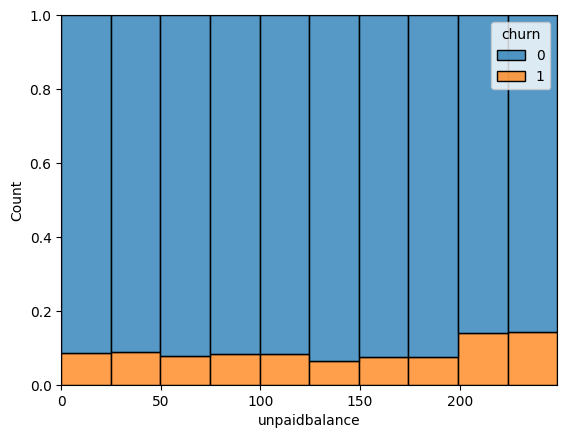

In [ ]:
sns.histplot(data=df, hue='churn', x='unpaidbalance', multiple="fill", bins=10)

After 200 bucks of debt on the balance sheet, the probability that the client will leave increases by 5-7%. The normal value is 7%, the value after $200 is 14%.

# Predicted model

In [ ]:
X = df.drop('churn', axis=1)
y = df.churn

Точность модели на валидационной выборке: 0.9846449136276392
Точность модели на тестовой выборке: 0.9635238560495033


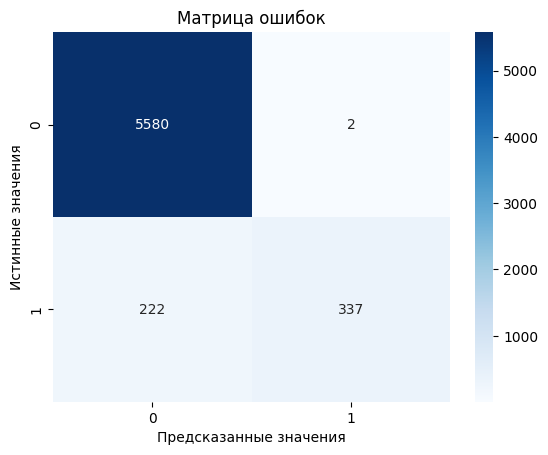

In [ ]:
# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.3,
                                                    random_state=42,
                                                    stratify=y)


# Oversampling with SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

# Data transformation
scaler = StandardScaler()
X_resampled = scaler.fit_transform(X_resampled)
X_test = scaler.transform(X_test)

# Split training data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=45, stratify=y_resampled)

# Create GradientBoostingClassifier model
gbc = GradientBoostingClassifier(random_state=42, n_estimators=200, learning_rate=0.5, max_depth=10)

# Train the model
gbc.fit(X_train, y_train)

# Evaluate the model on the validation set
y_pred_val = gbc.predict(X_val)
score_val = gbc.score(X_val, y_val)
print(f"Model accuracy on validation set: {score_val}")

# Evaluate the model on the test set
y_pred_test = gbc.predict(X_test)
score_test = gbc.score(X_test, y_test)
print(f"Model accuracy on test set: {score_test}")

# Plot confusion matrix for the test set
cm = confusion_matrix(y_test, y_pred_test)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted values')
plt.ylabel('True values')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
# Calculate metrics
accuracy = accuracy_score(y_test, y_pred_test)
recall = recall_score(y_test, y_pred_test)
precision = precision_score(y_test, y_pred_test)
f1 = f1_score(y_test, y_pred_test)

print(f"Recall: {recall}")
print(f"Precision: {precision}")
print(f"F1-score: {f1}")

Recall: 0.6028622540250447
Precision: 0.9941002949852508
F1-score: 0.7505567928730512


Recall: 0.6368515205724508
Precision: 0.8704156479217604
F1-score: 0.7355371900826446


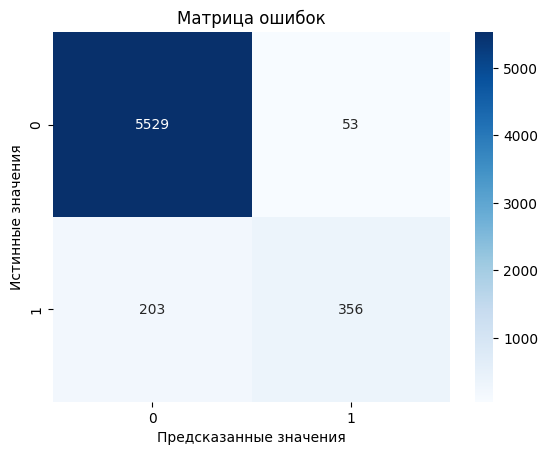

In [ ]:
# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.3,
                                                    random_state=42,
                                                    stratify=y)


# Oversampling with SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

# Data transformation
scaler = StandardScaler()
X_resampled = scaler.fit_transform(X_resampled)
X_test = scaler.transform(X_test)

# Split training data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=45, stratify=y_resampled)

rf = RandomForestClassifier(random_state=12,
                            n_estimators=250,
                            max_depth=30,
                            class_weight='balanced',
                            min_samples_split=2,
                            bootstrap=False,
                            min_samples_leaf=1,
                            criterion='log_loss'
                            )
rf.fit(X_train, y_train)

# Evaluation on test data
y_pred = rf.predict(X_test)

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Recall: {recall}")
print(f"Precision: {precision}")
print(f"F1-score: {f1}")

# Plot confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted values')
plt.ylabel('True values')
plt.title('Confusion Matrix')
plt.show()

Result:

Two models have been implemented to predict customer churn.

The first model is implemented using gradient boosting with the following accuracy in metrics:

* Recall: 0.6028622540250447

* Precision: 0.9941002949852508

* F1-score: 0.7505567928730512

The second model is implemented using a random forest with accuracy in metrics:

* Recall: 0.6368515205724508

* Precision: 0.8704156479217604

* F1-score: 0.7355371900826446

F1-score was chosen as the main metric, as a result of which the gradient boosting model collectively wins the random forest model in accuracy.

This model can be used to reduce customer churn by sending a list of clients to the customer support department so that they remind the client of the benefits that the company offers him, or offer some bonuses/temporary privileges to position the client towards the company and its products.